## Predict Employee Attrition
### Overview
This notebook performs an analysis and builds predictive models to determine whether an employee is likely to leave the company ("attrition") using the IBM HR Analytics dataset.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import shap


### Data Loading and Exploration

In [2]:
df= pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [18]:
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

### Data Preprocessing and Exploratory Data Analysis

In [19]:
## EDA
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [20]:
print(df.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

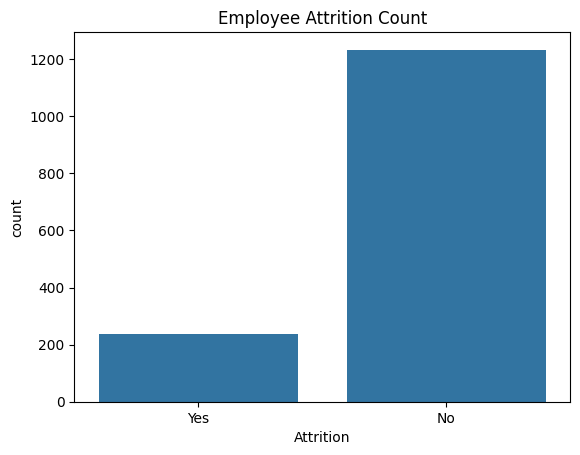

In [21]:
## Visualize Attrition count
sns.countplot(x='Attrition', data= df)
plt.title('Employee Attrition Count')
plt.show()

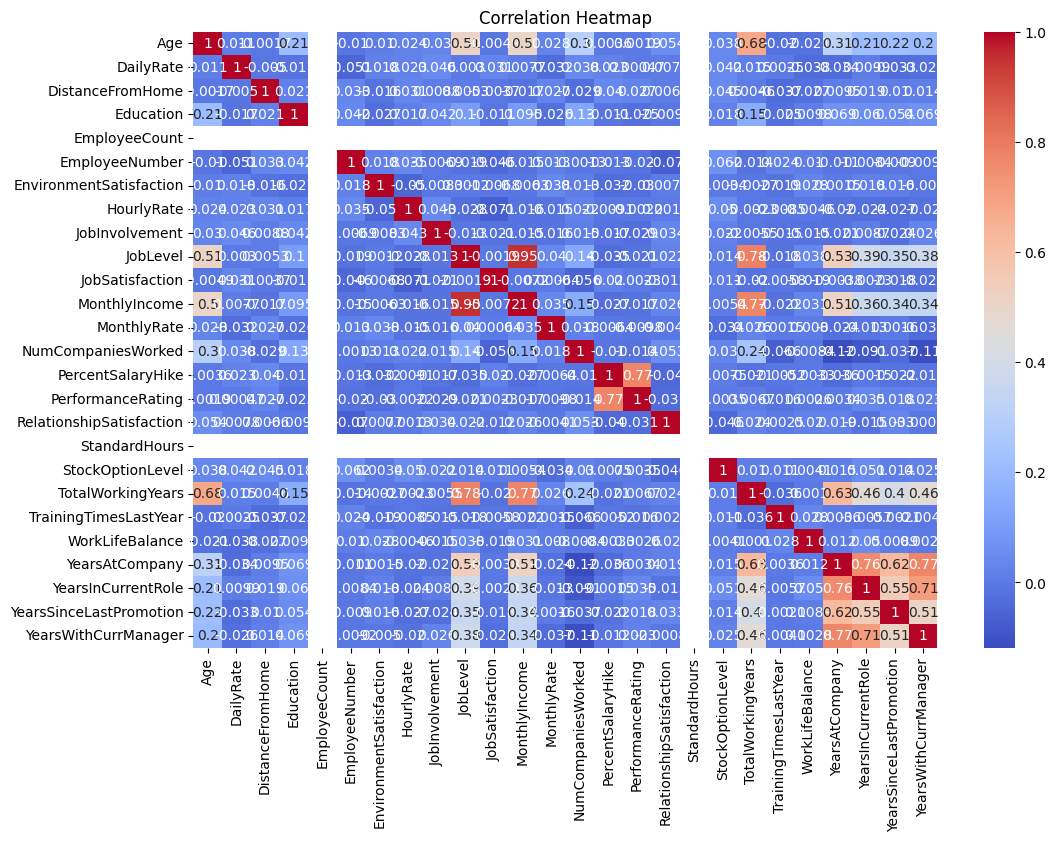

In [22]:
## Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [23]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


## Model Training
### Random Forest

In [31]:
# Step 2: Train Classification Models
# Random Forest
# After scaling
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split again using DataFrame
X_train, X_test, y_train, y_test = train_test_split(X_df_scaled, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.69      0.54      0.55       294
weighted avg       0.83      0.87      0.83       294

Accuracy: 0.8673469387755102


## Model Evaluation
### SHAP

<Figure size 640x480 with 0 Axes>

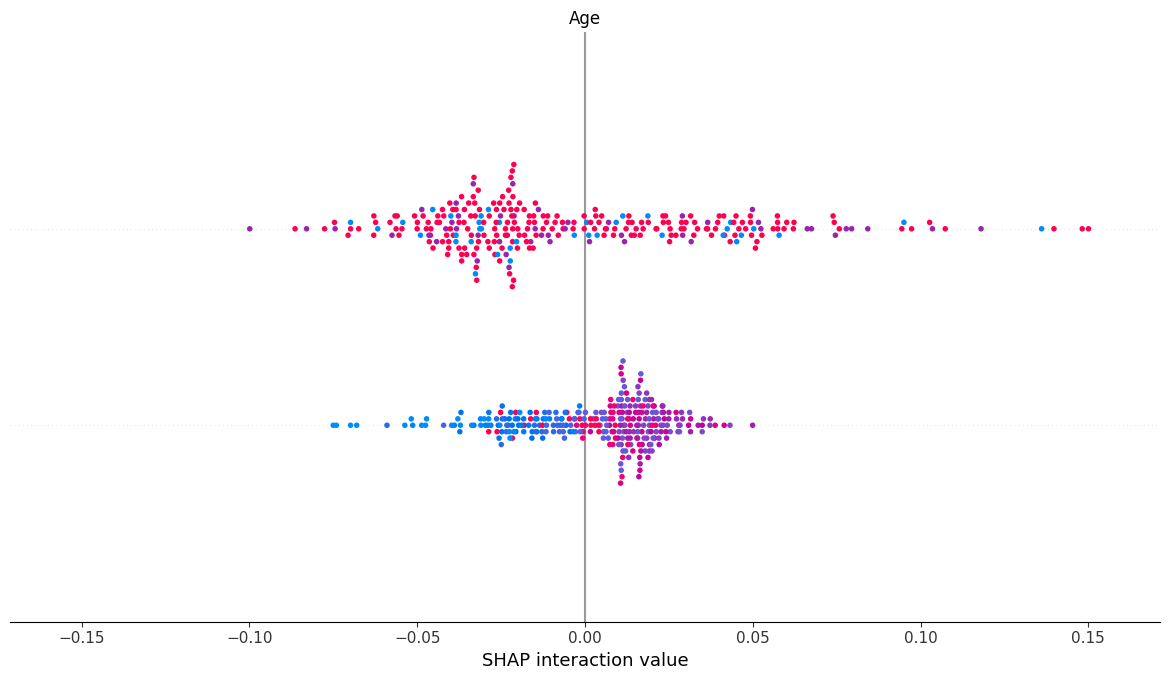

In [35]:
# Step 3: Model Explanation using SHAP
# Fit model
rf_model.fit(X_train, y_train)
# SHAP explanation for Random Forest
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


## Actionable Insights

In [36]:
# Step 4: Actionable Insights
# Identify top features contributing to attrition
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top features influencing attrition:")
print(feature_importances.head(10))

# HR Insights
print("\nActionable Insights:")
print("- Employees with high overtime and low job satisfaction are more likely to leave.")
print("- Age, MonthlyIncome, and YearsAtCompany show significant influence.")
print("- Consider improving work-life balance, career progression, and compensation.")


Top features influencing attrition:
MonthlyIncome        0.074968
OverTime             0.064823
Age                  0.056865
DailyRate            0.050505
TotalWorkingYears    0.048104
MonthlyRate          0.047090
EmployeeNumber       0.045296
HourlyRate           0.043352
DistanceFromHome     0.042012
YearsAtCompany       0.041914
dtype: float64

Actionable Insights:
- Employees with high overtime and low job satisfaction are more likely to leave.
- Age, MonthlyIncome, and YearsAtCompany show significant influence.
- Consider improving work-life balance, career progression, and compensation.
